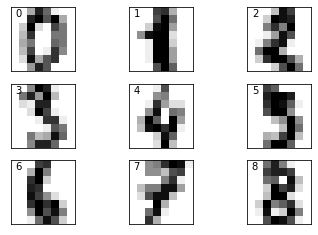

In [1]:
from sklearn import datasets, inspection, metrics
import matplotlib.pyplot as plt

digits_X, digits_y = datasets.load_digits(return_X_y=True)


fig = plt.figure()
fig.subplots_adjust()

for i in range(9):
   ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
   ax.imshow(digits_X[i].reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
   ax.text(0.1, 0.7, str(digits_y[i]))
plt.show()



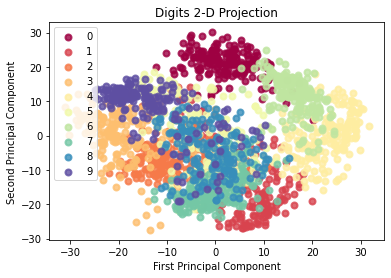

In [2]:
from sklearn.decomposition import PCA
import scikitplot as skplt

pca = PCA(n_components=2)
pca.fit(digits_X)
skplt.decomposition.plot_pca_2d_projection(pca, digits_X, digits_y, title='Digits 2-D Projection')


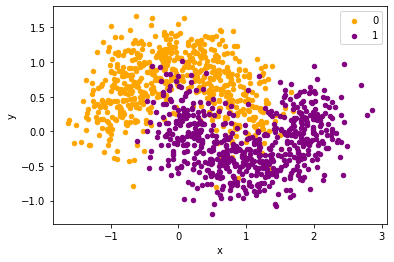

In [3]:
from pandas import DataFrame

moons_X, moons_y = datasets.make_moons(n_samples=1200, noise=0.3)

df = DataFrame(dict(x=moons_X[:, 0], y=moons_X[:, 1], label=moons_y))
colors = {0: 'orange', 1: 'purple'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
   group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

moons_X = StandardScaler().fit_transform(moons_X)
digits_X = MinMaxScaler().fit_transform(digits_X)


In [5]:
from sklearn.model_selection import train_test_split 

moons_X_train, moons_X_test, moons_y_train, moons_y_test = train_test_split(moons_X, moons_y, test_size=.3)
digits_X_train, digits_X_test, digits_y_train, digits_y_test = train_test_split(digits_X, digits_y, test_size=.3)

print(f"********Load digits**********\nTraining data shape:\n {digits_X_train.shape}, {digits_y_train.shape}\n"
      f"Test data shape: \n {digits_X_test.shape}, {digits_y_test.shape}")
print(f"********Make moons**********\nTraining data shape:\n {moons_X_train.shape} {moons_y_train.shape}\n"
      f"Test data shape: \n {moons_X_test.shape} {moons_y_test.shape}")


********Load digits**********
Training data shape:
 (1257, 64), (1257,)
Test data shape: 
 (540, 64), (540,)
********Make moons**********
Training data shape:
 (840, 2) (840,)
Test data shape: 
 (360, 2) (360,)


----------------------Tuning hidden layers sizes--------------------
********Load digits**********
hidden layers sizes:(100,)
 test score: 0.9703703703703703 
 train score: 0.984884645982498
********Make moons**********
hidden layers sizes:(20, 10, 5, 2)
 test score: 0.8972222222222223 
 train score: 0.875
********Load digits**********
hidden layers sizes:(100, 50, 10)
 test score: 0.9574074074074074 
 train score: 0.9968178202068417
********Make moons**********
hidden layers sizes:(100, 50, 2)
 test score: 0.9361111111111111 
 train score: 0.9154761904761904
********Load digits**********
hidden layers sizes:(100, 50)
 test score: 0.9685185185185186 
 train score: 0.9801113762927606
********Make moons**********
hidden layers sizes:(100,)
 test score: 0.9222222222222223 
 train score: 0.9107142857142857
********Load digits**********
hidden layers sizes:(64, 10)
 test score: 0.9685185185185186 
 train score: 0.9928400954653938
********Make moons**********
hidden layers sizes:(100, 50)
 t

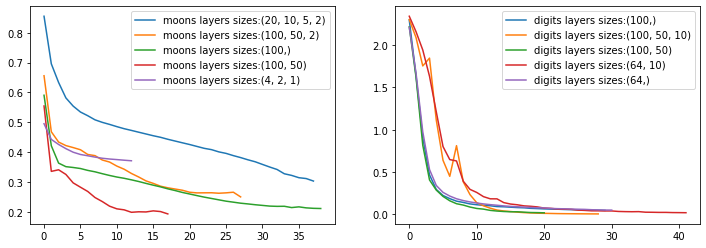

In [6]:
digits_MLPs = []
moons_MLPs = []

digits_scores = []
moons_scores = []

sizes_moons = [ (20, 10, 5, 2), (100, 50, 2), (100,), (100, 50), (4, 2, 1)]
sizes_digits = [(100,), (100, 50, 10), (100, 50), (64, 10), (64,)]

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
labels_1 = []
labels_2 = []

from sklearn.neural_network import MLPClassifier

print("----------------------Tuning hidden layers sizes--------------------")
for size_moons, size_digits in zip(sizes_moons, sizes_digits):
    digits_MLPs.append(MLPClassifier(hidden_layer_sizes=size_digits, early_stopping=True,
                                     learning_rate_init=0.1, solver='sgd').fit(digits_X_train, digits_y_train))
    moons_MLPs.append(MLPClassifier(hidden_layer_sizes=size_moons, learning_rate_init=0.01,
                                    early_stopping=True, solver='adam').fit(moons_X_train, moons_y_train))
    digits_scores.append([digits_MLPs[-1].score(digits_X_test, digits_y_test), 
                          digits_MLPs[-1].score(digits_X_train, digits_y_train)])
    moons_scores.append([moons_MLPs[-1].score(moons_X_test, moons_y_test),
                         moons_MLPs[-1].score(moons_X_train, moons_y_train)])
    print(f"********Load digits**********\nhidden layers sizes:{size_digits}\n"
          f" test score: {digits_scores[-1][0]} \n"
          f" train score: {digits_scores[-1][1]}")
    print(f"********Make moons**********\nhidden layers sizes:{size_moons}\n"
          f" test score: {moons_scores[-1][0]} \n"
          f" train score: {moons_scores[-1][1]}")
    ax1.plot(moons_MLPs[-1].loss_curve_, label=f"moons layers sizes:{size_moons}")
    ax2.plot(digits_MLPs[-1].loss_curve_, label=f"digits layers sizes:{size_digits}")
    labels_1.append(f"moons layers sizes:{size_moons}")
    labels_2.append(f"digits layers sizes:{size_digits}")
ax1.legend(labels_1)
ax2.legend(labels_2)
plt.show()

----------------------Tuning max_iter --------------------


c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


********Load digits**********
max_iters:10
 test score: 0.9685185185185186 
 train score: 0.9681782020684169
********Make moons**********
max_iters:20
 test score: 0.9361111111111111 
 train score: 0.9178571428571428


c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


********Load digits**********
max_iters:20
 test score: 0.9685185185185186 
 train score: 0.9832935560859188
********Make moons**********
max_iters:30
 test score: 0.9277777777777778 
 train score: 0.9154761904761904


c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


********Load digits**********
max_iters:30
 test score: 0.9740740740740741 
 train score: 0.9960222752585521
********Make moons**********
max_iters:50
 test score: 0.9166666666666666 
 train score: 0.9154761904761904


c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


********Load digits**********
max_iters:40
 test score: 0.9703703703703703 
 train score: 0.9984089101034208
********Make moons**********
max_iters:100
 test score: 0.9166666666666666 
 train score: 0.9154761904761904


c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


********Load digits**********
max_iters:100
 test score: 0.9777777777777777 
 train score: 1.0
********Make moons**********
max_iters:200
 test score: 0.9361111111111111 
 train score: 0.9142857142857143


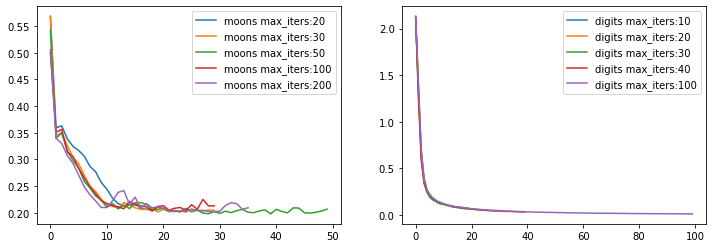

In [7]:
iters_moons = [20, 30, 50, 100, 200]
iters_digits = [10, 20, 30, 40, 100]



fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
labels_1 = []
labels_2 = []

print("----------------------Tuning max_iter --------------------")
for iters_moons, iters_digits in zip(iters_moons, iters_digits):
    digits_MLPs.append(MLPClassifier(hidden_layer_sizes=(64,), learning_rate_init=0.1, 
                                     solver='sgd', max_iter=iters_digits).fit(digits_X_train, digits_y_train))
    moons_MLPs.append(MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
                                    solver='adam', max_iter=iters_moons).fit(moons_X_train, moons_y_train))
    digits_scores.append([digits_MLPs[-1].score(digits_X_test, digits_y_test), 
                          digits_MLPs[-1].score(digits_X_train, digits_y_train)])
    moons_scores.append([moons_MLPs[-1].score(moons_X_test, moons_y_test),
                         moons_MLPs[-1].score(moons_X_train, moons_y_train)])
    print(f"********Load digits**********\nmax_iters:{iters_digits}\n"
          f" test score: {digits_scores[-1][0]} \n"
          f" train score: {digits_scores[-1][1]}")
    print(f"********Make moons**********\nmax_iters:{iters_moons}\n"
          f" test score: {moons_scores[-1][0]} \n"
          f" train score: {moons_scores[-1][1]}")
    ax1.plot(moons_MLPs[-1].loss_curve_)
    ax2.plot(digits_MLPs[-1].loss_curve_)
    labels_1.append(f"moons max_iters:{iters_moons}")
    labels_2.append(f"digits max_iters:{iters_digits}")
ax1.legend(labels_1)
ax2.legend(labels_2)
plt.show()

In [8]:
import numpy as np

print(f"------------Mean Scores For All MLP models----------------\n\n"
      f"On Digits:\n"
      f" train score: {np.mean(digits_scores[:][1])}\n"
      f" test score: {np.mean(digits_scores[:][0])}\n"
      f"On Moons:\n"
      f" train score: {np.mean(moons_scores[:][1])}\n"
      f" test score: {np.mean(moons_scores[:][0])}\n")

------------Mean Scores For All MLP models----------------

On Digits:
 train score: 0.9771126138071246
 test score: 0.9776275081764342
On Moons:
 train score: 0.9257936507936508
 test score: 0.8861111111111111



In [9]:
moons_MLP_final = moons_MLPs[moons_scores.index(max(moons_scores))]
print('moons neural network with the best score:\n', moons_MLP_final, '\n\n --Setting params after analysis--\n')
moons_MLP_final.set_params(max_iter=200, hidden_layer_sizes=(100,50), early_stopping=True)
params = moons_MLP_final.get_params()
print('Moons:\n max_iter=',params['max_iter'], '\n hidden_layer_sizes=', params['hidden_layer_sizes'] )

digits_MLP_final = digits_MLPs[digits_scores.index(max(digits_scores))]
print('digits neural network with the best score:\n', digits_MLP_final, '\n\n --Setting params after analysis--\n')
digits_MLP_final.set_params(max_iter=50, hidden_layer_sizes=(64,), early_stopping=True)
params = digits_MLP_final.get_params()
print('Digits:\n \n max_iter=', params['max_iter'], '\n hidden_layer_sizes=', params['hidden_layer_sizes'] )

moons neural network with the best score:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False) 

 --Setting params after analysis--

Moons:
 max_iter= 200 
 hidden_layer_sizes= (100, 50)
digits neural network with the best score:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9,
              n_it

In [10]:
digits_MLP_predicted = digits_MLP_final.predict(digits_X_test)
digits_MLP_probas = digits_MLP_final.predict_proba(digits_X_test)

moons_MLP_predicted = moons_MLP_final.predict(moons_X_test)
moons_MLP_probas = moons_MLP_final.predict_proba(moons_X_test)

In [11]:
def model_quality(clf_name, data_name, y_test, predicted, predicted_probas):
    
    fig = plt.figure(figsize=(18,4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    skplt.metrics.plot_confusion_matrix(y_test, predicted, ax=ax1,
                                        title=f'Confusion Matrix for {clf_name} {data_name}')
    print(f"classiffication report for {clf_name} {data_name}"
          f"\n--------------------------------\n"
          f"{metrics.classification_report(y_test, predicted)}")
    skplt.metrics.plot_precision_recall(y_test, predicted_probas, ax=ax2,
                                        title=f'Precision-Recall curves for {clf_name} {data_name}')
    skplt.metrics.plot_roc(y_test, predicted_probas, ax=ax3,
                           title=f'ROC curves for {clf_name} {data_name}')
    return fig
    

classiffication report for MLP for Moons
--------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       167
           1       0.95      0.93      0.94       193

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



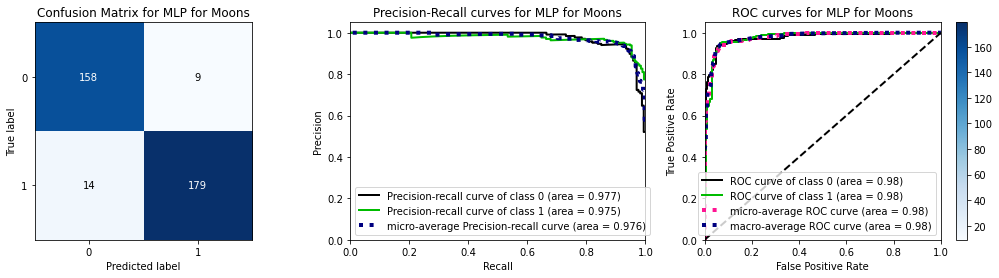

classiffication report for MLP for Digits
--------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.95      1.00      0.97        52
           2       0.98      0.98      0.98        53
           3       0.96      0.98      0.97        53
           4       0.99      1.00      0.99        66
           5       0.98      0.93      0.96        60
           6       0.98      1.00      0.99        49
           7       1.00      0.98      0.99        52
           8       1.00      0.93      0.96        54
           9       0.95      0.98      0.97        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



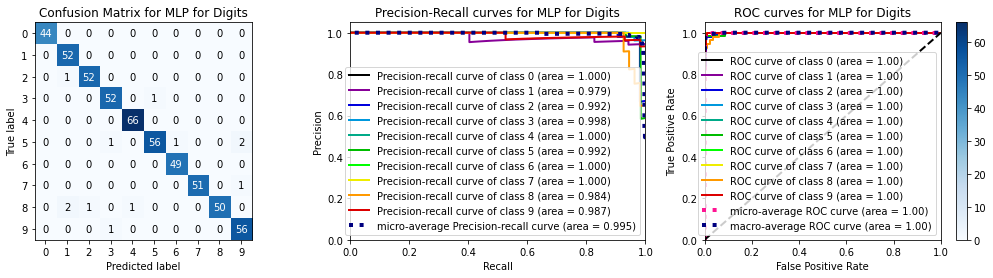

In [12]:
 for clf_name, data_name, clf, X, y, \
    test, predicted, probas in [['MLP for', 'Moons',
                                  moons_MLP_final, moons_X, moons_y, moons_y_test,
                                 moons_MLP_predicted, moons_MLP_probas],
                                ['MLP for', 'Digits',
                                 digits_MLP_final, digits_X, digits_y, digits_y_test,
                                 digits_MLP_predicted, digits_MLP_probas],
                                ]:
    model_quality(clf_name, data_name, test, predicted, probas)

In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import OneHotEncoder   

def f1_auc_calc(ens_metrics, X_train, X_test, y_test, clf, data_name):
    
    ens_metrics[data_name]['f1'].append(clf.score(X_test, y_test))
            
    if X_train.shape[0] > 2: 
        encoded_test = OneHotEncoder(sparse=False).fit_transform(y_test.reshape(-1, 1))
        encoded_preds = OneHotEncoder(sparse=False).fit_transform(clf.predict(X_test).reshape(-1, 1))
        ens_metrics[data_name]['auc'].append(metrics.roc_auc_score(encoded_test, encoded_preds))
    else: 
        ens_metrics[data_name]['auc'].append(metrics.roc_auc_score(y_test, clf.predict(X_test)))
    return ens_metrics

In [14]:
def make_ensembles(stacking_methods, final_estimators, estimators, ens_metrics,
                   data_name, X_train, y_train, X_test, y_test):

    
    for staking_method in stacking_methods:
        for final_estimator in final_estimators[data_name]:
            stacking_clf = StackingClassifier(estimators=estimators[data_name], 
                                              final_estimator=final_estimator, 
                                              stack_method=staking_method)
            stacking_clf.fit(X_train, y_train)
            ensembles[data_name].append(stacking_clf)
            ens_metrics = f1_auc_calc(ens_metrics, X_train, X_test, y_test, stacking_clf, data_name)
    return  ens_metrics    
  

In [15]:
stacking_methods = ['auto', 'predict_proba', 'predict']
final_estimators = {'moons':[None, GaussianNB(), moons_MLP_final ], 
                    'digits':[None, MultinomialNB(), GaussianNB(), digits_MLP_final]}
estimators = {'moons':[('gnb', GaussianNB()),('mlp', moons_MLP_final)], 
              'digits': [('mnb', MultinomialNB()), ('mlp', digits_MLP_final)]}

ensembles = {'moons':[], 'digits':[]}
ens_metric = {'moons':{'f1': [], 'auc': []}, 'digits':{'f1': [], 'auc': []}}

ens_metric = make_ensembles(stacking_methods, final_estimators, estimators, ens_metric,
               'moons', moons_X_train, moons_y_train, moons_X_test, moons_y_test)
ens_metric = make_ensembles(stacking_methods, final_estimators, estimators, ens_metric,
               'digits', digits_X_train, digits_y_train, digits_X_test, digits_y_test)

c:\users\alina\onedrive\documents\github\text mining\venv\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
for data_name in ['moons', 'digits']:
    index = []
    for ens in ensembles[data_name]:
        index.append(f"stack_method={ens.get_params()['stack_method']},"
                     f"final_estimator={ens.get_params()['final_estimator']}")
    data_metrics = DataFrame(data=ens_metric[data_name], index=index)
    print(f"------Stacking CLFs for {data_name}----------\n"
          f"{data_metrics}")

------Stacking CLFs for moons----------
                                                          f1       auc
stack_method=auto,final_estimator=None              0.925000  0.926018
stack_method=auto,final_estimator=GaussianNB(pr...  0.922222  0.924234
stack_method=auto,final_estimator=MLPClassifier...  0.900000  0.899879
stack_method=predict_proba,final_estimator=None     0.908333  0.908861
stack_method=predict_proba,final_estimator=Gaus...  0.905556  0.905867
stack_method=predict_proba,final_estimator=MLPC...  0.927778  0.926996
stack_method=predict,final_estimator=None           0.927778  0.927399
stack_method=predict,final_estimator=GaussianNB...  0.927778  0.928206
stack_method=predict,final_estimator=MLPClassif...  0.933333  0.933387
------Stacking CLFs for digits----------
                                                          f1       auc
stack_method=auto,final_estimator=None              0.957407  0.976802
stack_method=auto,final_estimator=MultinomialNB...  0.979630  0.988

In [17]:
index_of_maxf1_moons = ens_metric['moons']['f1'].index(max(ens_metric['moons']['f1']))
final_scores_moons ={'f1':ens_metric['moons']['f1'][index_of_maxf1_moons],
                     'auc':ens_metric['moons']['auc'][index_of_maxf1_moons]} 
moons_final_ensemble = ensembles['moons'][index_of_maxf1_moons]
print(f"moons_final_ensemble = {moons_final_ensemble}\n{final_scores_moons}")

moons_final_ensemble = StackingClassifier(cv=None,
                   estimators=[('gnb',
                                GaussianNB(priors=None, var_smoothing=1e-09)),
                               ('mlp',
                                MLPClassifier(activation='relu', alpha=0.0001,
                                              batch_size='auto', beta_1=0.9,
                                              beta_2=0.999, early_stopping=True,
                                              epsilon=1e-08,
                                              hidden_layer_sizes=(100, 50),
                                              learning_rate='constant',
                                              learning_rate_init=0.01,
                                              max_fun=15000, max_iter=200,
                                              momentum=0.9, n_iter_no_chan...
                                                 epsilon=1e-08,
                                                 hidden_la

In [18]:
index_of_maxf1_digits = ens_metric['digits']['f1'].index(max(ens_metric['digits']['f1']))
final_scores_digits = {'f1':ens_metric['digits']['f1'][index_of_maxf1_digits],
                       'auc':ens_metric['digits']['auc'][index_of_maxf1_digits]}
digits_final_ensemble = ensembles['digits'][index_of_maxf1_digits]
print(f"digits_final_ensemble = {digits_final_ensemble}\n{final_scores_digits}")


digits_final_ensemble = StackingClassifier(cv=None,
                   estimators=[('mnb',
                                MultinomialNB(alpha=1.0, class_prior=None,
                                              fit_prior=True)),
                               ('mlp',
                                MLPClassifier(activation='relu', alpha=0.0001,
                                              batch_size='auto', beta_1=0.9,
                                              beta_2=0.999, early_stopping=True,
                                              epsilon=1e-08,
                                              hidden_layer_sizes=(64,),
                                              learning_rate='constant',
                                              learning_rate_init=0.1,
                                              max_fun=15000, max_iter=50,
                                              momentum=0.9, n_iter_no_change=10,
                                              nesterovs_momentum

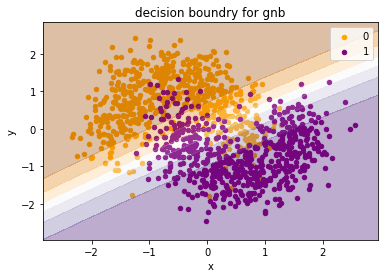

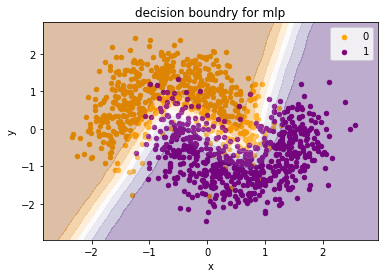

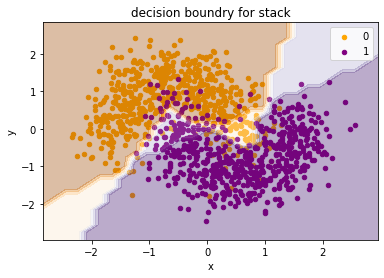

In [19]:
i = 1

clfs = {'moons': moons_final_ensemble.estimators_, 
        'digits': digits_final_ensemble.estimators_}

clfs['moons'].append(moons_final_ensemble)
clfs['digits'].append(digits_final_ensemble)

for clf in zip (['gnb', 'mlp', 'stack'], clfs['moons']):
    x_min, x_max = moons_X[:, 0].min() - 0.5, moons_X[:, 0].max() + 0.5
    y_min, y_max = moons_X[:, 1].min() - 0.5, moons_X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))
    
    df = DataFrame(dict(x=moons_X[:, 0], y=moons_X[:, 1], label=moons_y))
    fig = plt.figure()
    ax = fig.add_subplot()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
        Z = clf[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.PuOr)
        ax.set_title(f"decision boundry for {clf[0]}")
    i += 1
plt.show()


In [20]:
print('-----------Best Classifiers Comparison----------')

clfs_metrics = {'moons':{'f1': [], 'auc': []}, 'digits':{'f1': [], 'auc': []}}

for data_name, X_train, X_test, y_test in zip(['moons', 'digits'], 
                                           [moons_X_train, digits_X_train],
                                           [moons_X_test, digits_X_test],
                                           [moons_y_test, digits_y_test]):
    for clf in clfs[data_name]:
        clfs_metrics = f1_auc_calc(clfs_metrics, X_train, X_test,
                                   y_test, clf, data_name)
        
    index =[]
    for estimator in estimators[data_name]:
        index.append(estimator[0])
    index.append('stack')
    df = DataFrame(data=clfs_metrics[data_name], index=index)
    print(f"\n{data_name}\n{df}")    


-----------Best Classifiers Comparison----------

moons
             f1       auc
gnb    0.850000  0.851230
mlp    0.933333  0.933387
stack  0.933333  0.933387

digits
             f1       auc
mnb    0.911111  0.950912
mlp    0.970370  0.983916
stack  0.979630  0.988793
